In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

print("\n" + "="*50)
print("DATA TYPES AND MISSING VALUES")
print("="*50)
print(df.info())

print("\n" + "="*50)
print("MISSING VALUES")
print("="*50)
print(df.isnull().sum())

DATASET OVERVIEW
Shape: (7043, 21)

First few rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupp

In [4]:
# Check for spaces in TotalCharges (common issue in this dataset)
print("\n" + "="*50)
print("CHECKING TOTALCHARGES COLUMN")
print("="*50)
print(f"Unique values in TotalCharges (first 10): {df['TotalCharges'].unique()[:10]}")


CHECKING TOTALCHARGES COLUMN
Unique values in TotalCharges (first 10): ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']


In [5]:
# Convert TotalCharges to numeric (will convert spaces to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Missing values after conversion: {df['TotalCharges'].isnull().sum()}")

Missing values after conversion: 11


In [6]:
# Handle missing values - these are new customers with 0 tenure
print(f"\nChecking tenure for missing TotalCharges:")
print(df[df['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])


Checking tenure for missing TotalCharges:
      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN
3331  7644-OMVMY       0           19.85           NaN
3826  3213-VVOLG       0           25.35           NaN
4380  2520-SGTTA       0           20.00           NaN
5218  2923-ARZLG       0           19.70           NaN
6670  4075-WKNIU       0           73.35           NaN
6754  2775-SEFEE       0           61.90           NaN


In [7]:
# Fill missing TotalCharges with 0 or MonthlyCharges (for new customers)
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

print("\n" + "="*50)
print("TARGET VARIABLE ANALYSIS")
print("\n" + "="*50)
churn_dist = df['Churn'].value_counts()
print(f"\nChurn Distribution")
print(churn_dist)
print(f"\nChurn Rate: {churn_dist['Yes'] / len(df) * 100:.2f}%")


TARGET VARIABLE ANALYSIS


Churn Distribution
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


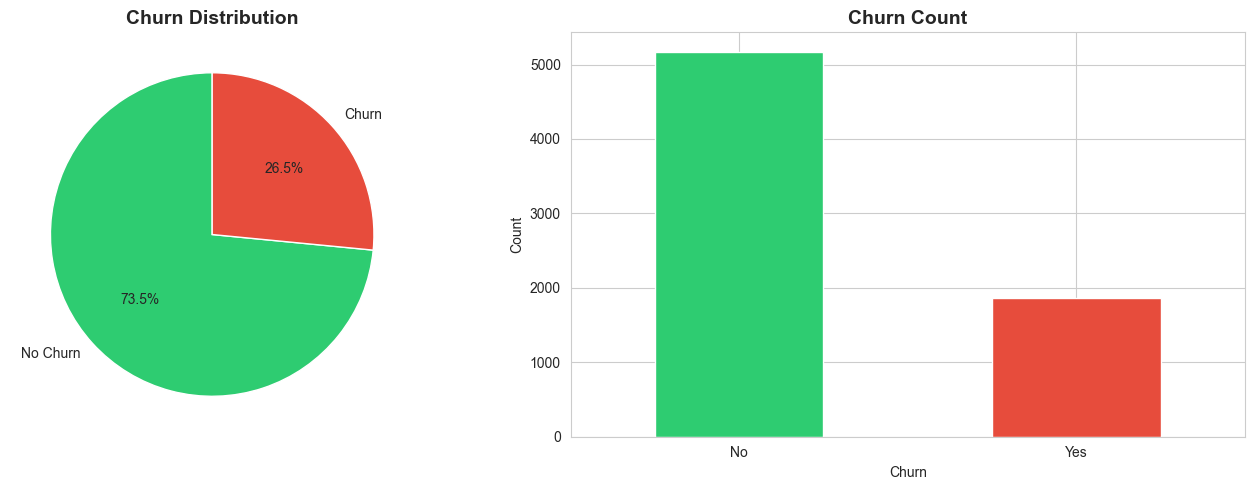


NUMERICAL FEATURES ANALYSIS

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.798992
std      24.559481       30.090047   2266.730170
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


In [8]:
# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
axes[0].pie(churn_dist.values, labels=['No Churn', 'Churn'],
           autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')

# Bar chart
churn_dist.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Churn Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.savefig('churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*50)
print("NUMERICAL FEATURES ANALYSIS")
print("\n" + "="*50)
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(df[numerical_cols].describe())

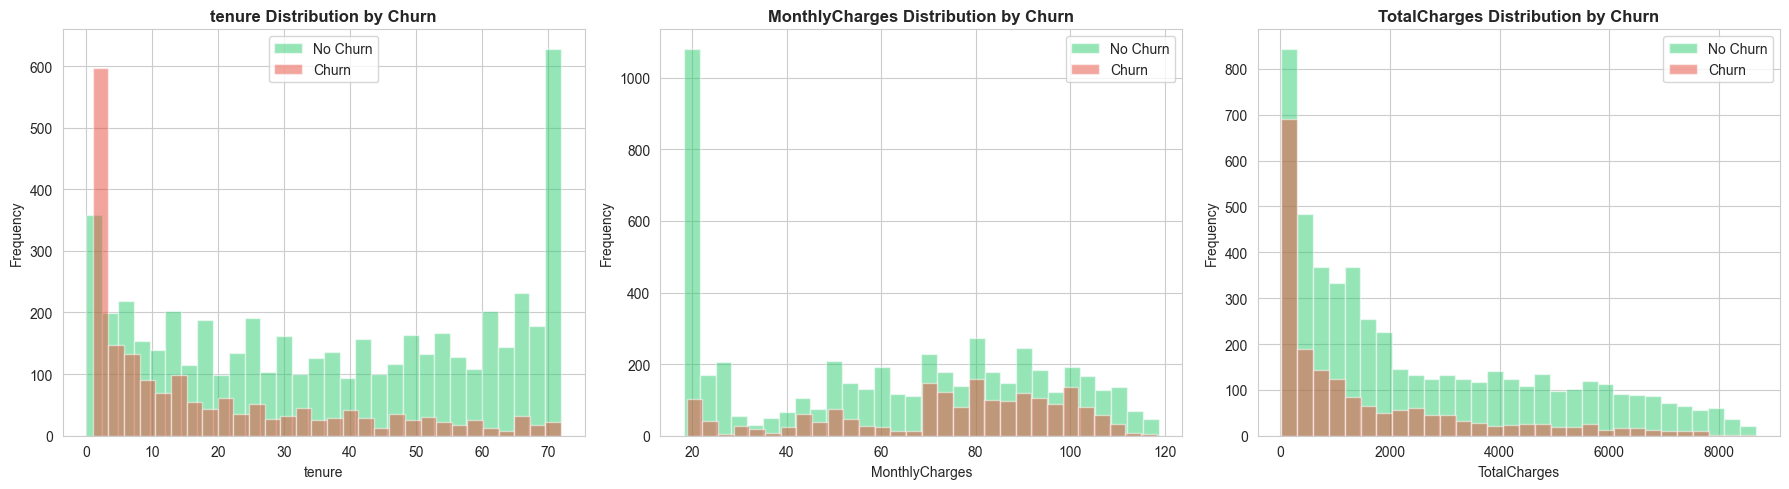


CATEGORICAL FEATURES ANALYSIS
Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


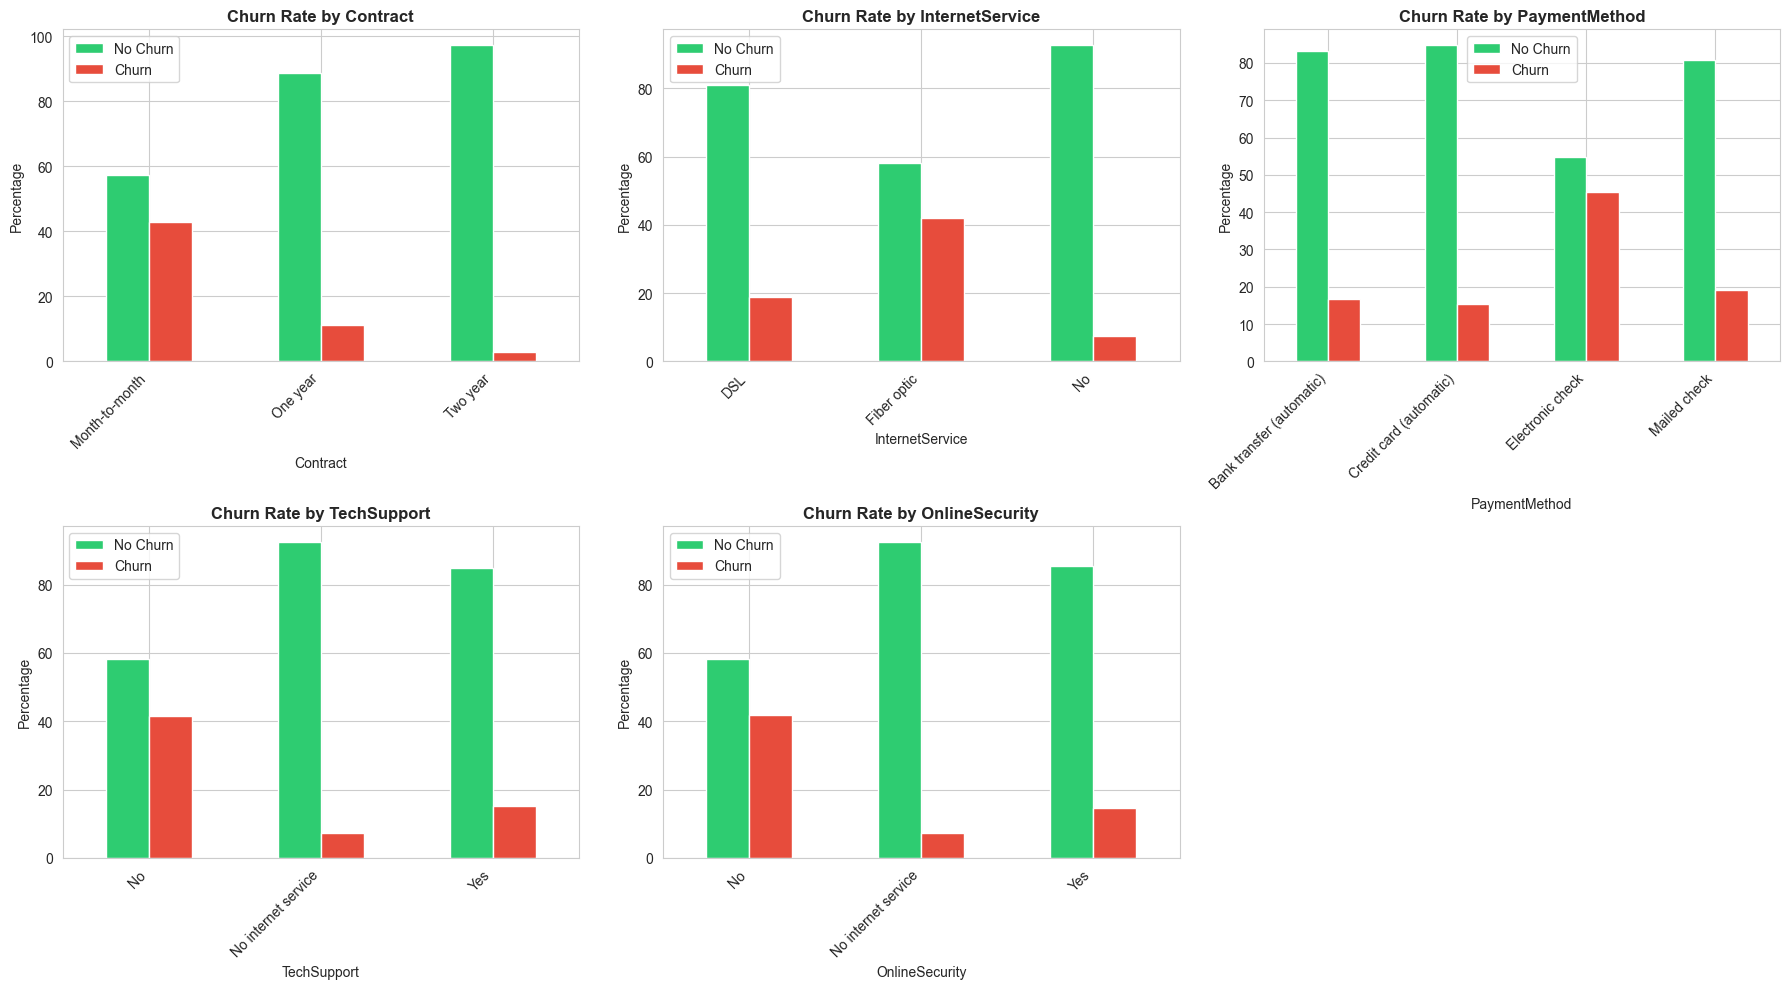

In [13]:
# Visualize numerical features by churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(numerical_cols):
    df[df['Churn']=='No'][col].hist(bins=30, alpha=0.5, label='No Churn',
                                   ax=axes[idx], color='#2ecc71')
    df[df['Churn']=='Yes'][col].hist(bins=30, alpha=0.5, label='Churn',
                                    ax=axes[idx], color='#e74c3c')
    axes[idx].set_title(f'{col} Distribution by Churn', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('numerical_features_by_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*50)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*50)

# Select categorical columns (excluding customerID and target)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

print(f"Categorical features: {categorical_cols}")

# Analyze top categorical features
key_features = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    churn_by_cat = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    churn_by_cat.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'Churn Rate by {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage')
    axes[idx].legend(['No Churn', 'Churn'])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')

# Remove extra subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.savefig('categorical_features_churn_rate.png', dpi=300, bbox_inches='tight')
plt.show()

Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.198347
tenure           -0.352229
Name: Churn, dtype: float64


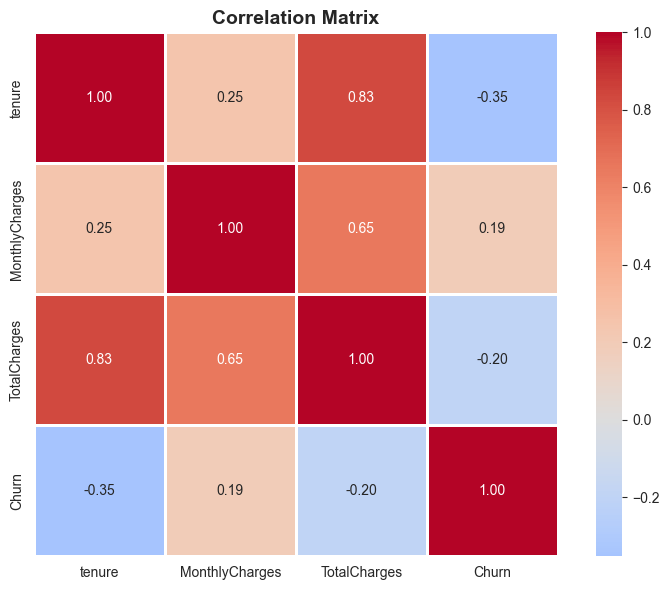


KEY INSIGHTS FROM EDA
1. Class Imbalance: ~26.5% churn rate - we'll need to handle this
2. Tenure: Lower tenure correlates with higher churn
3. Contract: Month-to-month contracts have highest churn
4. Internet Service: Fiber optic users churn more
5. TotalCharges: Negative correlation with churn (longer customers)



In [14]:
# Create a copy for correlation analysis
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Select only numerical columns for correlation
corr_matrix = df_corr[numerical_cols + ['Churn']].corr()
print(corr_matrix['Churn'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*50)
print("KEY INSIGHTS FROM EDA")
print("="*50)
print("1. Class Imbalance: ~26.5% churn rate - we'll need to handle this")
print("2. Tenure: Lower tenure correlates with higher churn")
print("3. Contract: Month-to-month contracts have highest churn")
print("4. Internet Service: Fiber optic users churn more")
print("5. TotalCharges: Negative correlation with churn (longer customers)")
print("\n" + "="*50)

In [17]:
# Save cleaned data
df.to_csv('../data/cleaned_data.csv', index=False)
print("Cleaned data saved to '../data/cleaned_data.csv'")

Cleaned data saved to '../data/cleaned_data.csv'
